In [1]:
import os
import re
import sys
from collections import Counter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append(os.path.realpath(".."))

from evlp_bronch.util import get_project_root_dir

## CSV Files

In [2]:
LABELED_DATA_DIR = get_project_root_dir() / "data/labelled_data"
CSV_FILES = sorted(LABELED_DATA_DIR.glob("*.csv"))
[csv_file.name for csv_file in CSV_FILES]

['EVLP01_labeled.csv',
 'EVLP02_labeled.csv',
 'EVLP03_labeled.csv',
 'EVLP04_labeled.csv',
 'EVLP05_labeled.csv',
 'EVLP06_labeled.csv',
 'EVLP07_labeled.csv',
 'EVLP08_labeled.csv',
 'EVLP09_labeled.csv',
 'EVLP10_labeled.csv',
 'EVLP11_labeled.csv',
 'EVLP12_labeled.csv',
 'EVLP13_labeled.csv',
 'EVLP14_labeled.csv',
 'EVLP15_labeled.csv',
 'EVLP16_labeled.csv',
 'EVLP17_labeled.csv',
 'EVLP18_labeled.csv',
 'EVLP19_labeled.csv',
 'EVLP20_labeled.csv',
 'EVLP21_labeled.csv',
 'EVLP22_labeled.csv',
 'EVLP23_labeled.csv',
 'EVLP24_labeled.csv',
 'EVLP25_labeled.csv',
 'EVLP26_labeled.csv',
 'EVLP27_labeled.csv',
 'EVLP28_labeled.csv',
 'EVLP29_labeled.csv',
 'EVLP30_labeled.csv',
 'EVLP31_labeled.csv',
 'EVLP32_labeled.csv',
 'EVLP33_labeled.csv',
 'EVLP34_labeled.csv',
 'EVLP35_labeled.csv',
 'EVLP36_labeled.csv',
 'EVLP37_labeled.csv',
 'EVLP38_labeled.csv',
 'EVLP39_labeled.csv',
 'EVLP40_labeled.csv',
 'EVLP41_labeled.csv',
 'EVLP42_labeled.csv',
 'EVLP43_labeled.csv',
 'EVLP44_la

In [3]:
all_lung_ids = set()
for csv_file in CSV_FILES:
    lung_id = re.fullmatch(
        r"(?:\d+_)?EVLP(?P<lung_id>\d+)_labeled.csv", csv_file.name
    ).group("lung_id")
    all_lung_ids.add(int(lung_id))
tuple(sorted(all_lung_ids))

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60)

## Labels

In [4]:
all_labels = set()
for csv_file in CSV_FILES:
    all_labels = all_labels.union(pd.read_csv(csv_file)["Label"].values)
all_labels = sorted(all_labels)
all_labels

['Assessment',
 'Bronch',
 'Deflation',
 'InPause',
 'Noise',
 'Normal',
 'Question',
 'Recruitment',
 'Unvisited']

## Abnormal Values

In [5]:
for csv_file in CSV_FILES:
    df = pd.read_csv(csv_file)
    abnormal_df = df[df["Label"].isin(["Normal", "Assessment"]) & (df["Dy_comp"] < 10)]
    if abnormal_df.shape[0] > 0:
        print(csv_file.name)
        print(abnormal_df[["Breath_num", "Dy_comp", "Label"]])

# V1:
# 610:130: deflation
# 4:1122: noise
# 12:1335: bronch

# New:
# 4:1122: noise
# 13:1335 bronch

EVLP04_labeled.csv
      Breath_num   Dy_comp       Label
1121        1122  0.364022  Assessment
EVLP13_labeled.csv
      Breath_num    Dy_comp       Label
1334        1335 -25.676775  Assessment


## Numbers of Breaths

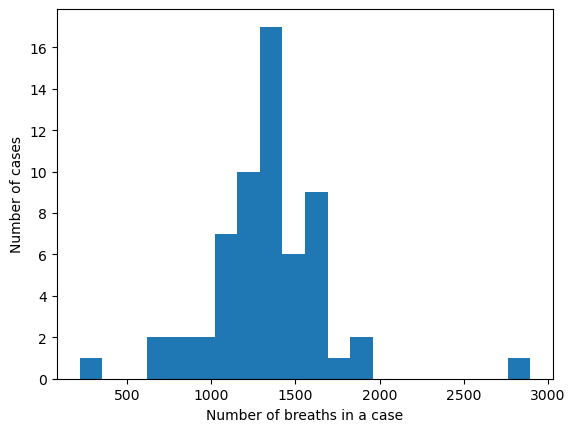

In [6]:
plt.hist([pd.read_csv(csv_file).shape[0] for csv_file in CSV_FILES], bins=20)
plt.xlabel("Number of breaths in a case")
plt.ylabel("Number of cases")
# plt.savefig("num_breaths_hist.png", transparent=True)
None

## Distribution of Labels

Counter({'Normal': 44277, 'Assessment': 24422, 'Bronch': 5667, 'Noise': 2148, 'Recruitment': 1955, 'InPause': 710, 'Deflation': 382, 'Question': 27, 'Unvisited': 10})


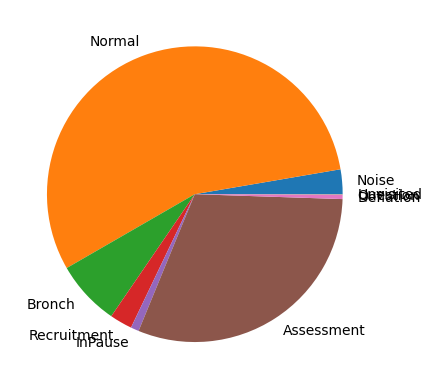

In [7]:
label_counter = Counter()
for csv_file in CSV_FILES:
    label_counter.update(pd.read_csv(csv_file)["Label"].values)
print(label_counter)
plt.pie(label_counter.values(), labels=label_counter.keys())
# plt.savefig("label_pie.png", transparent=True)
None

## Dynamic Compliance

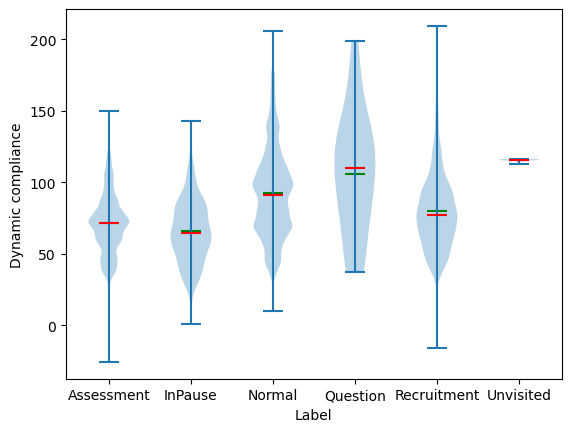

In [8]:
labels_of_interest = sorted(
    set(all_labels).difference({"Bronch", "Deflation", "Noise"})
)  # ["Normal", "Assessment"]
dy_comp_data = {label: [] for label in labels_of_interest}

for csv_file in CSV_FILES:
    df = pd.read_csv(csv_file)
    for label in labels_of_interest:
        dy_comp_data[label].append(df["Dy_comp"][df["Label"] == label])

violin = plt.violinplot(
    [np.concatenate(data) for data in dy_comp_data.values()],
    showmeans=True,
    showmedians=True,
)
violin["cmeans"].set_edgecolor("green")
violin["cmedians"].set_edgecolor("red")
plt.xticks(
    np.arange(1, len(labels_of_interest) + 1),
    labels=labels_of_interest,
)
plt.xlabel("Label")
plt.ylabel("Dynamic compliance")
# plt.savefig("dy_comp_violin.png", transparent=True)
None

/var/folders/6k/8jphdjqd56vgnxwrpmjyd0sw0000gn/T/ipykernel_14257/1200471606.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


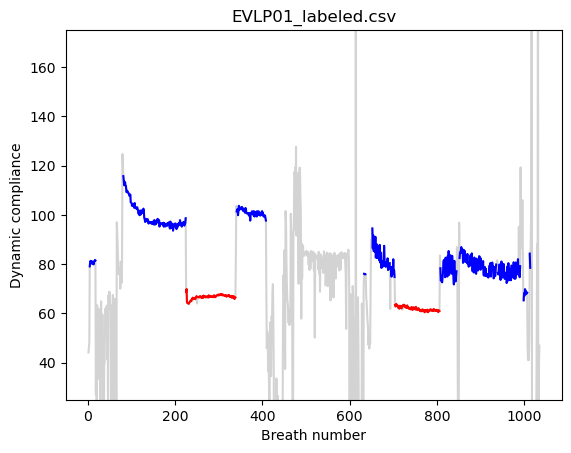

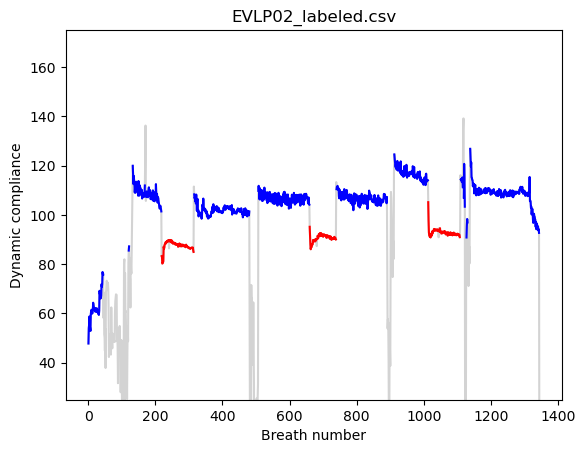

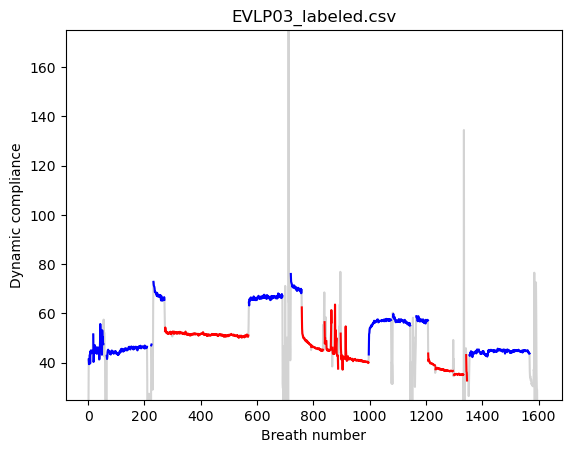

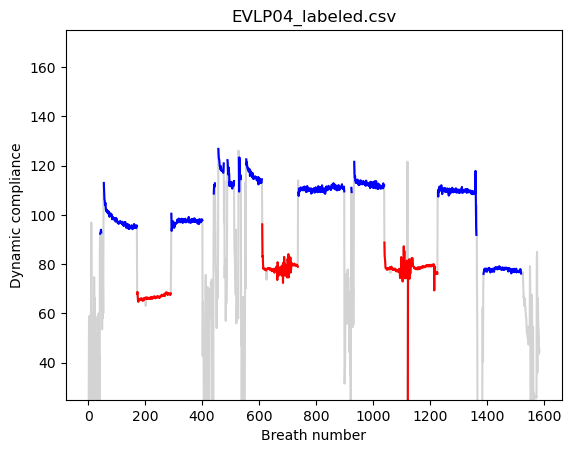

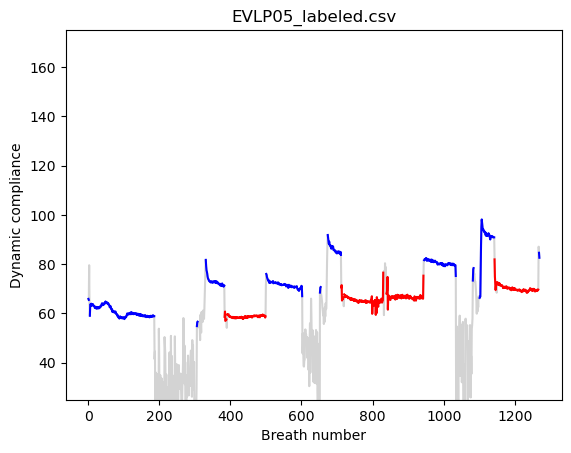

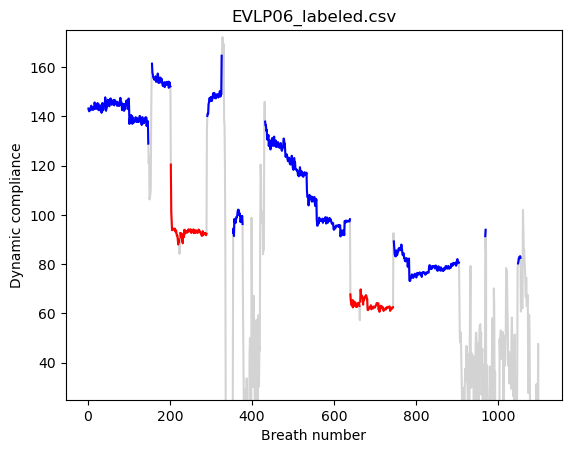

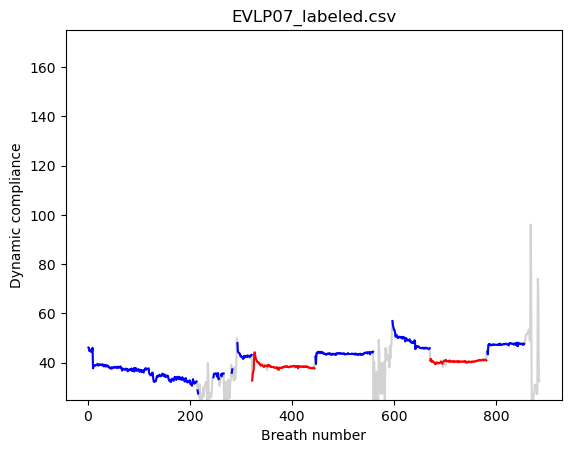

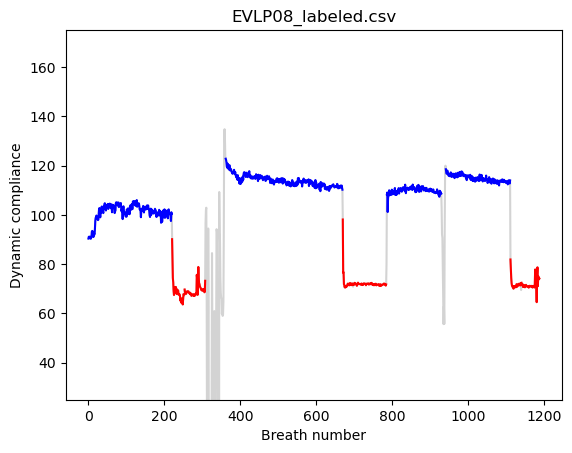

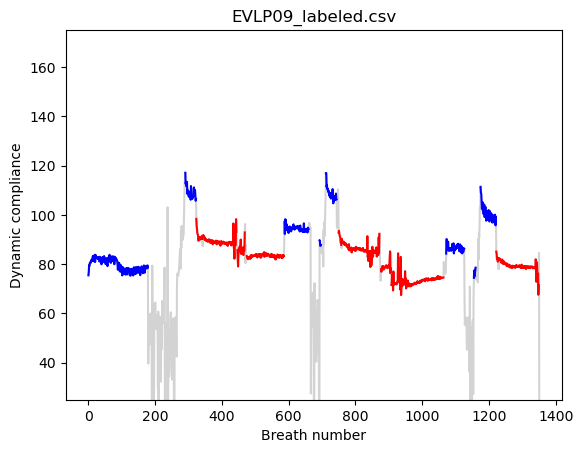

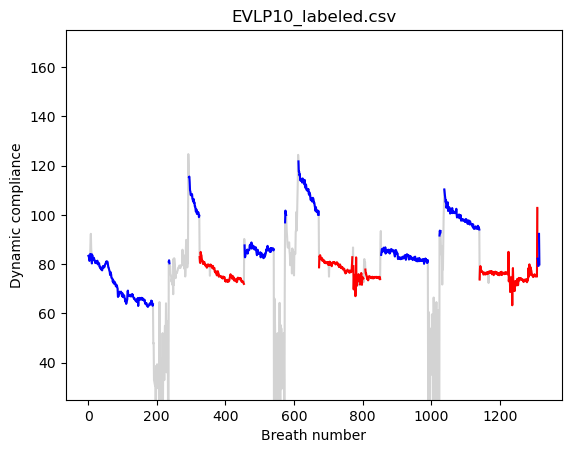

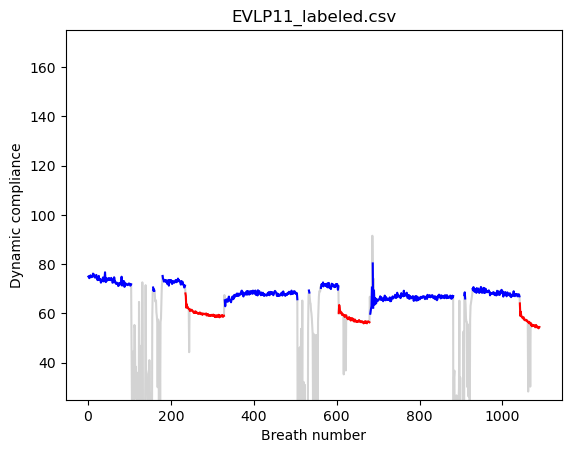

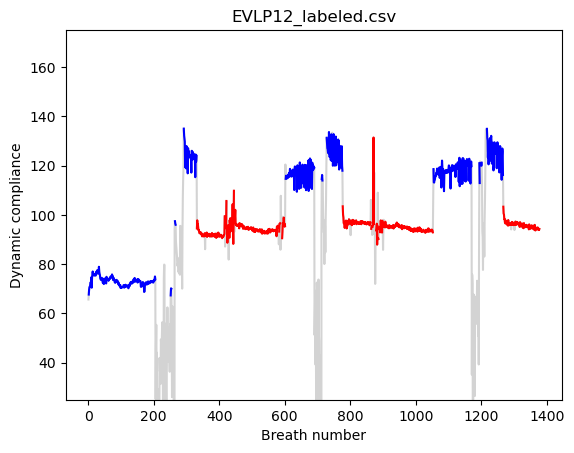

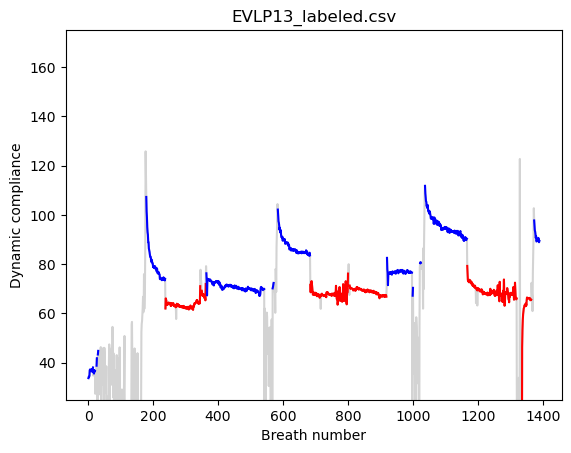

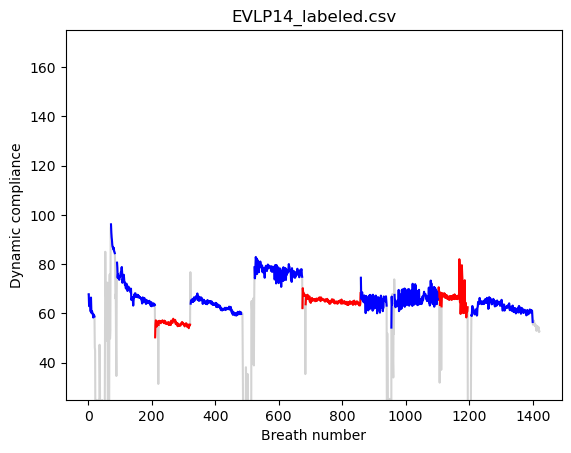

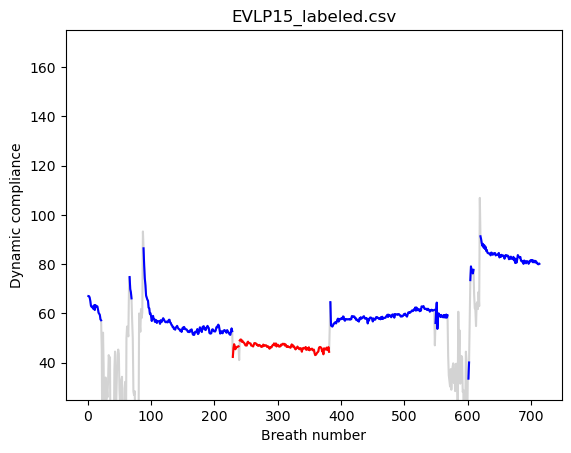

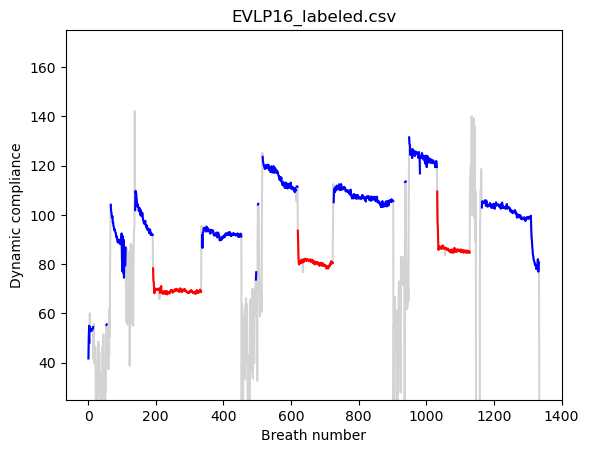

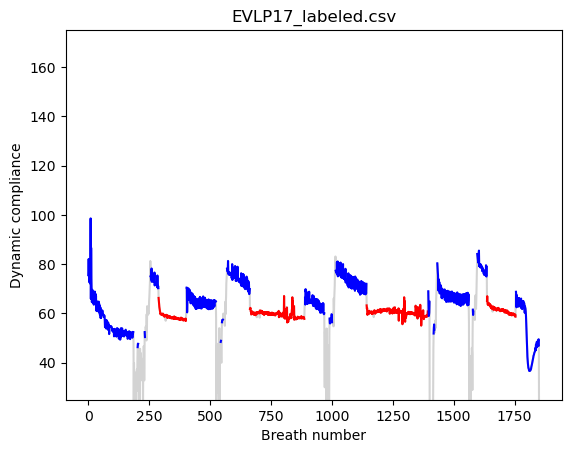

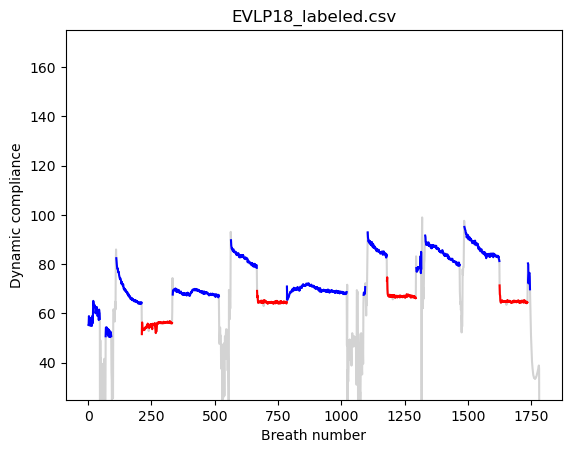

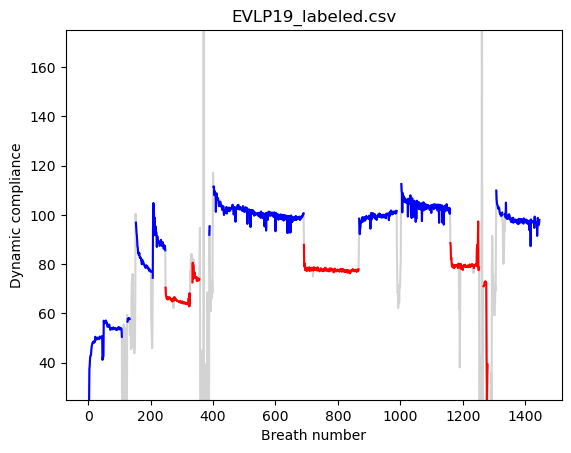

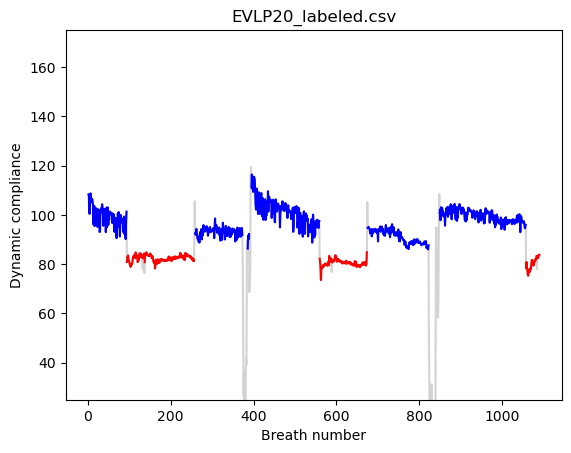

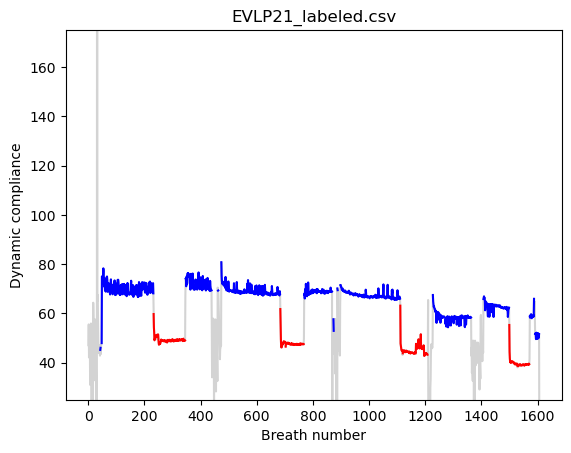

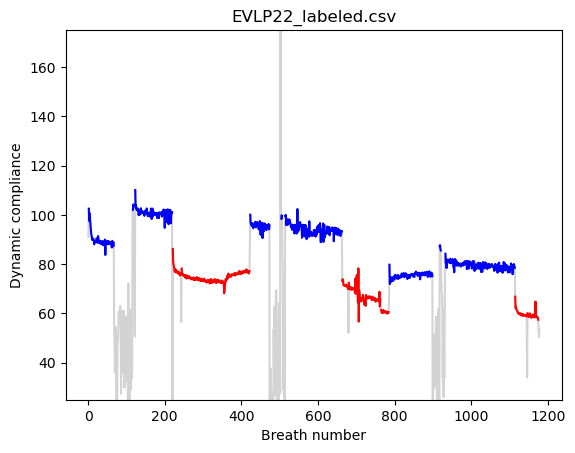

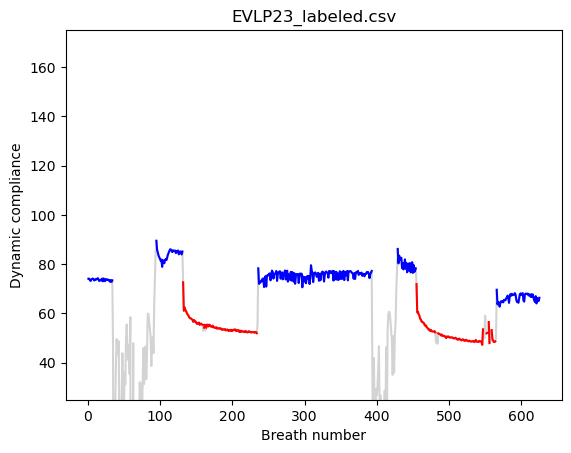

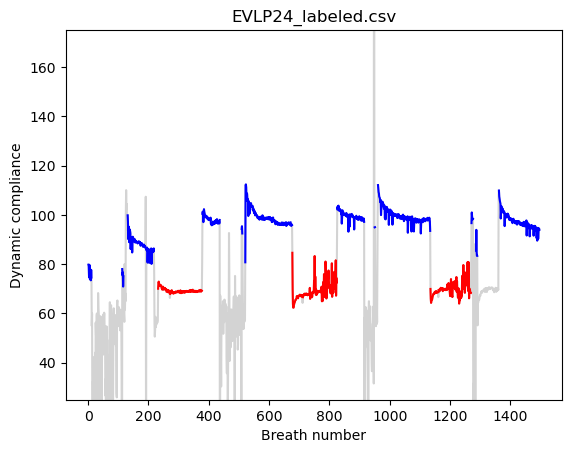

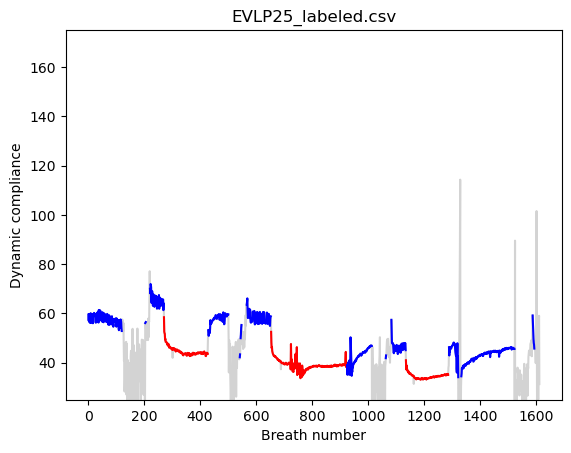

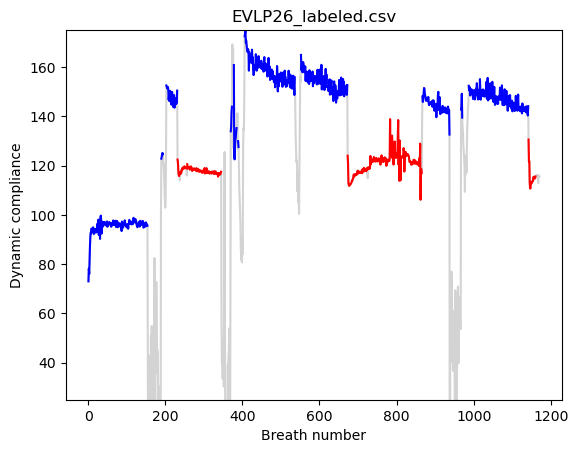

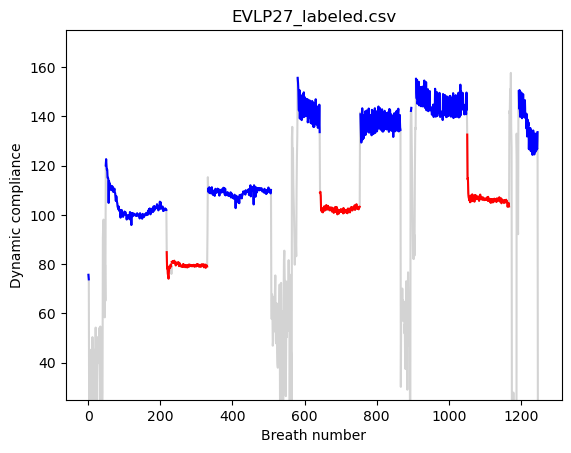

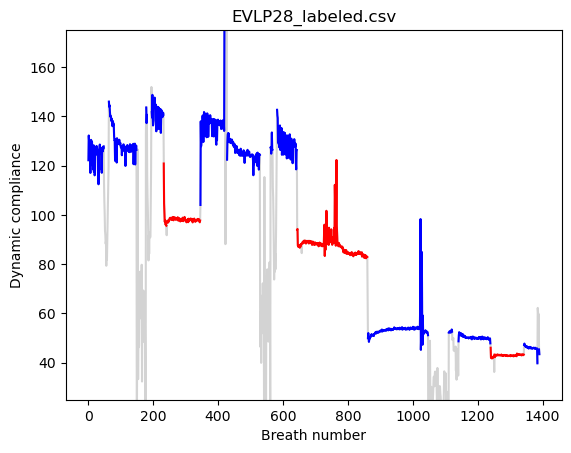

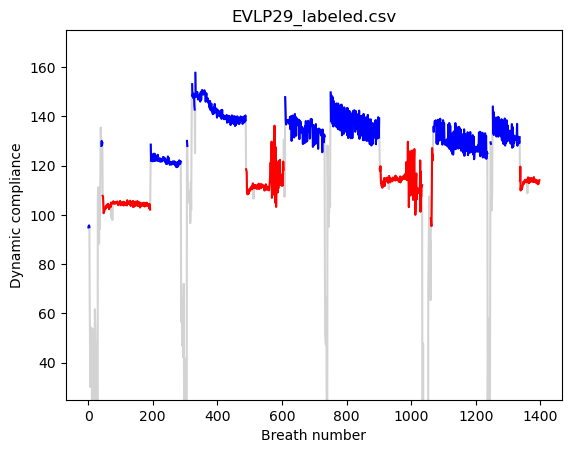

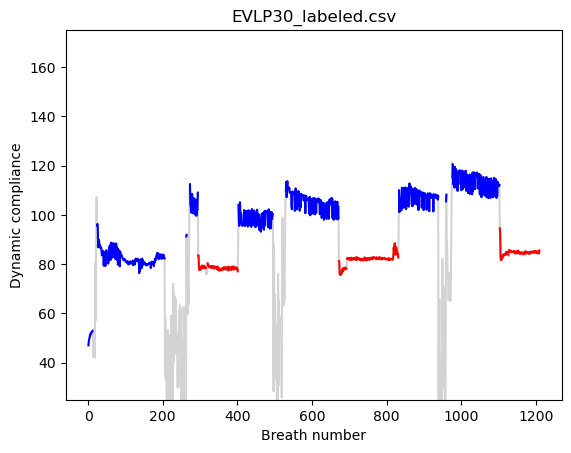

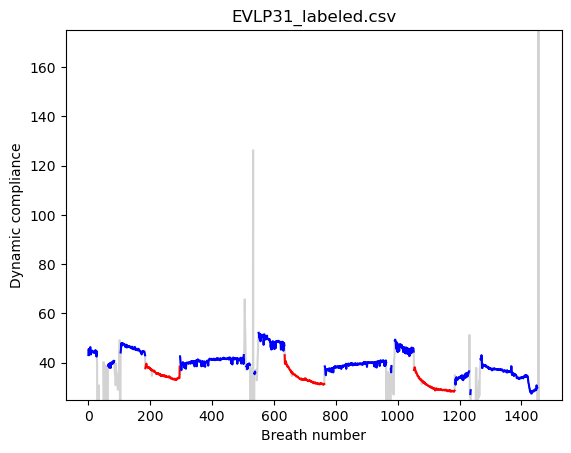

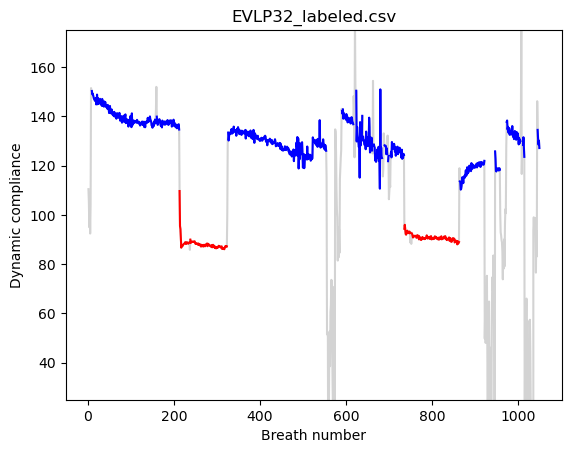

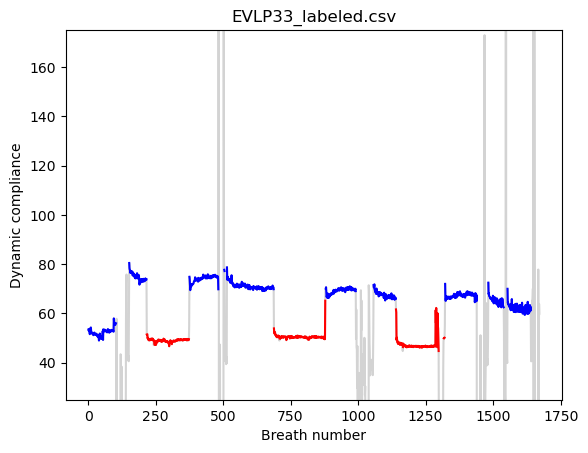

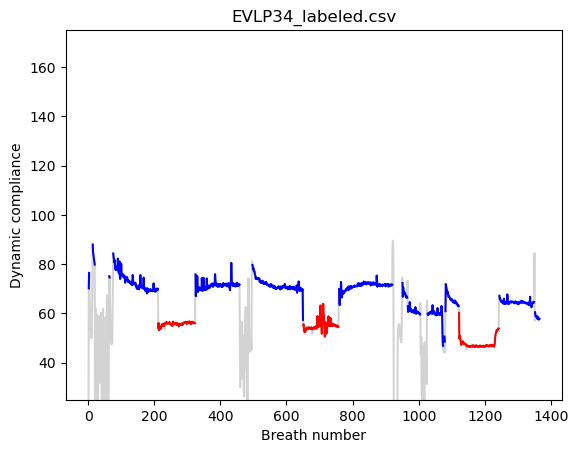

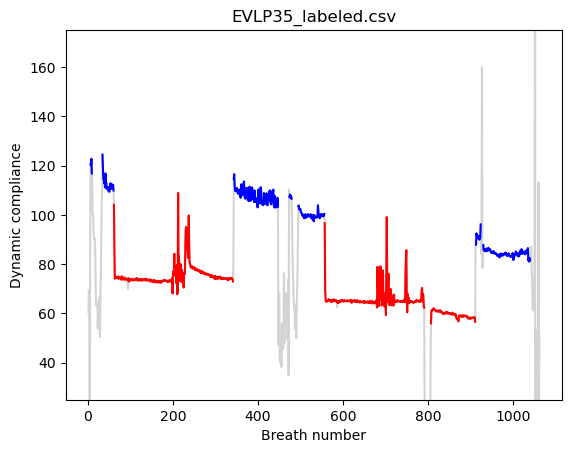

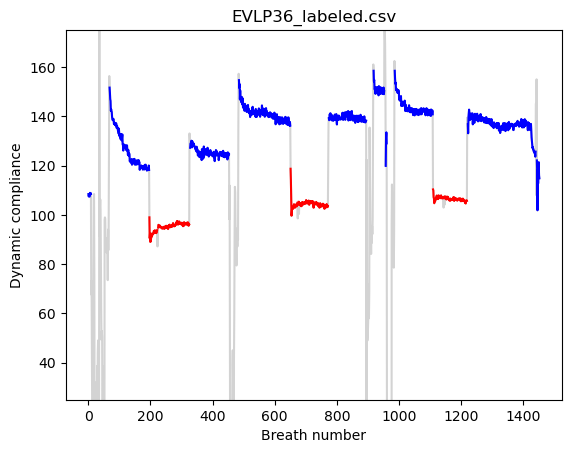

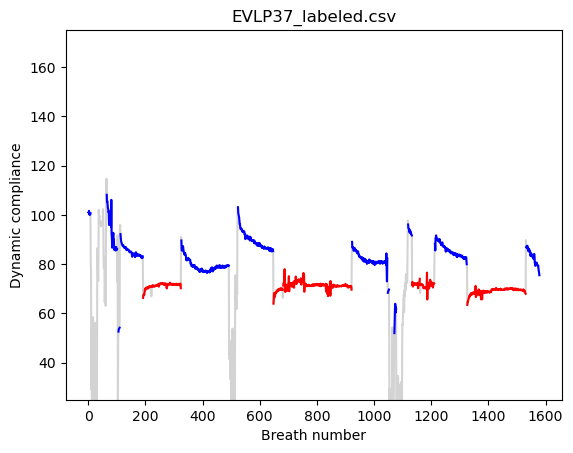

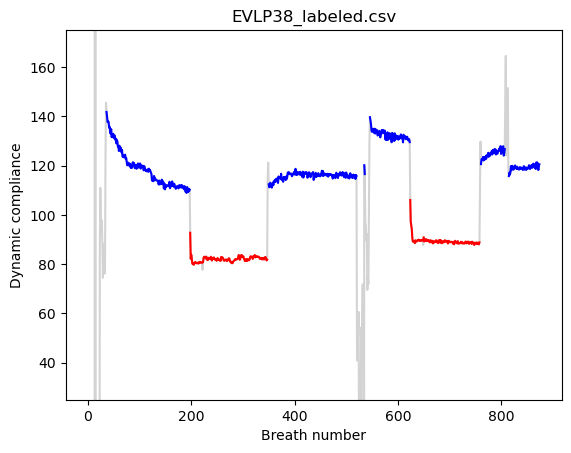

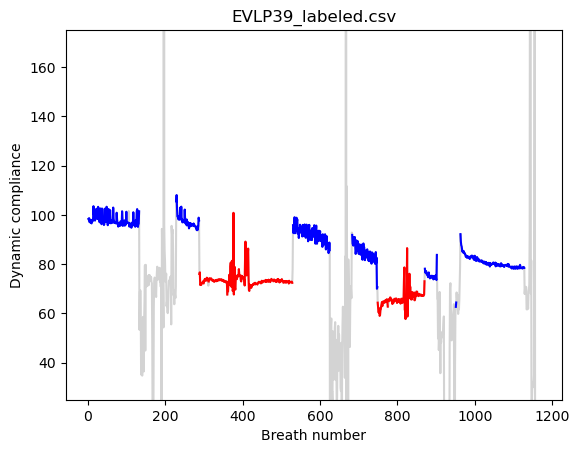

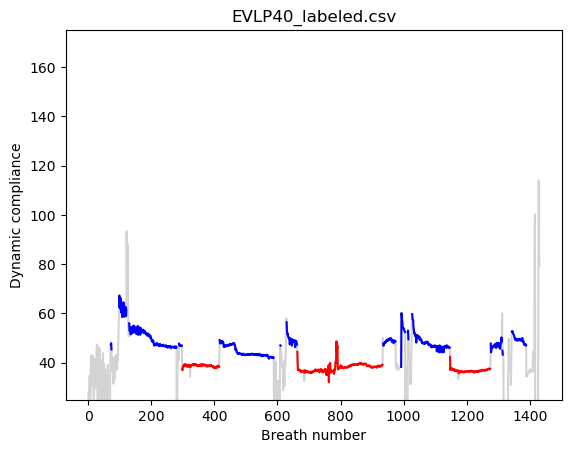

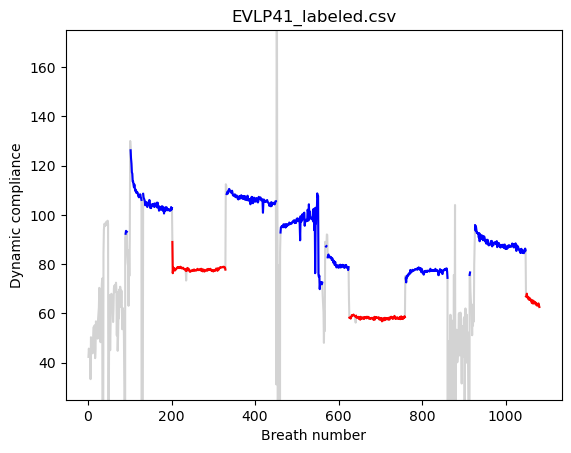

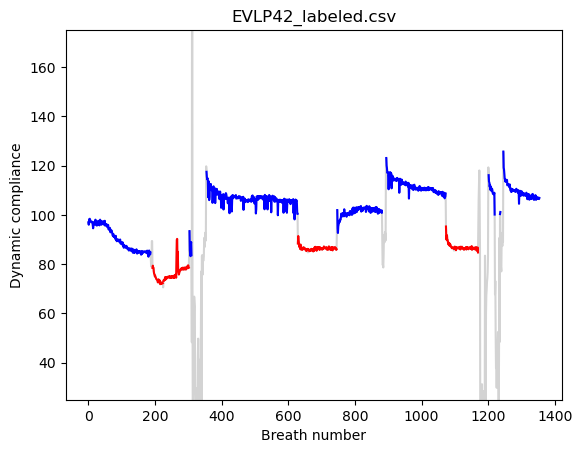

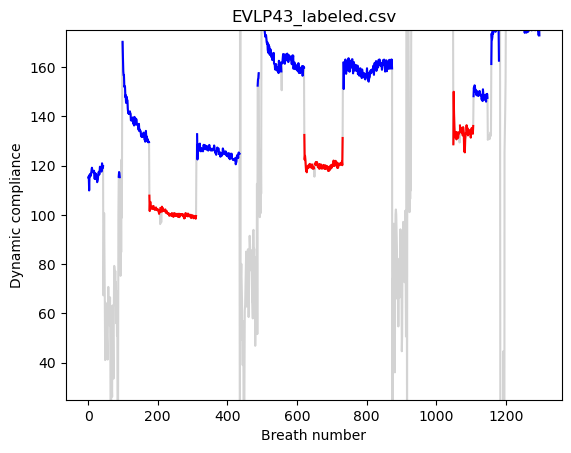

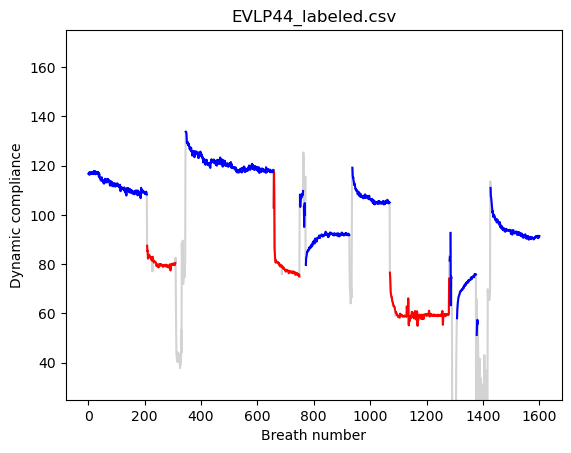

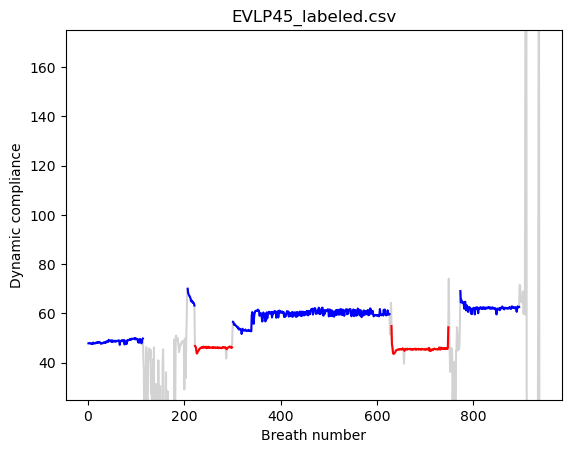

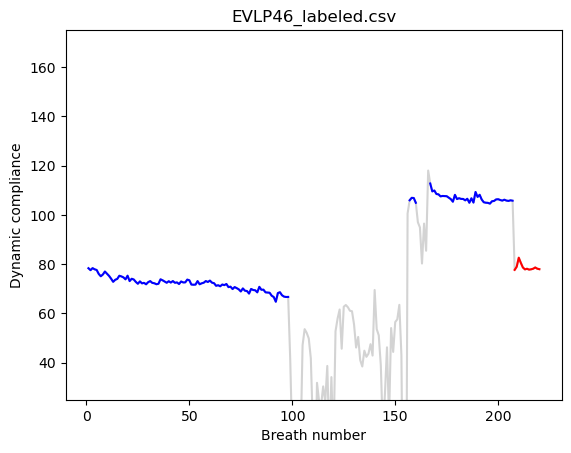

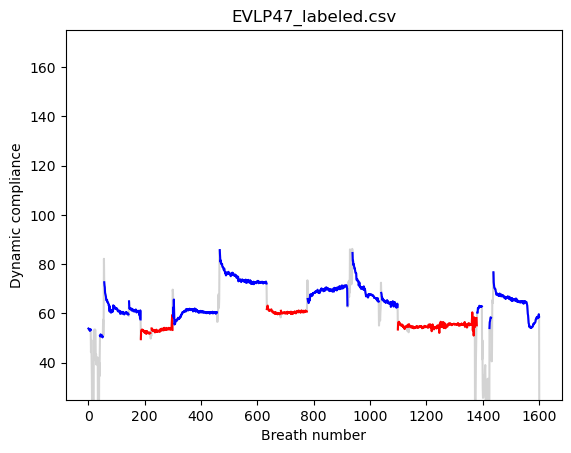

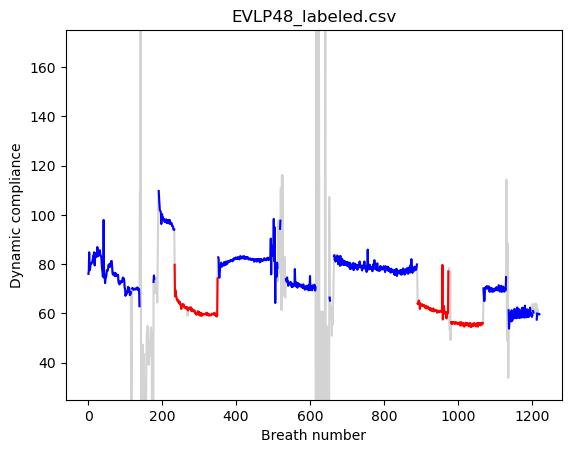

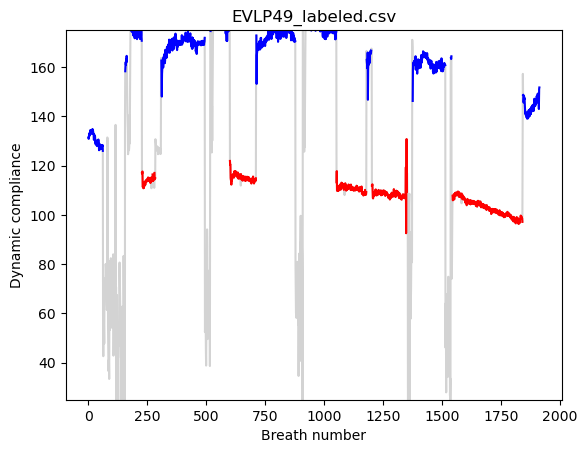

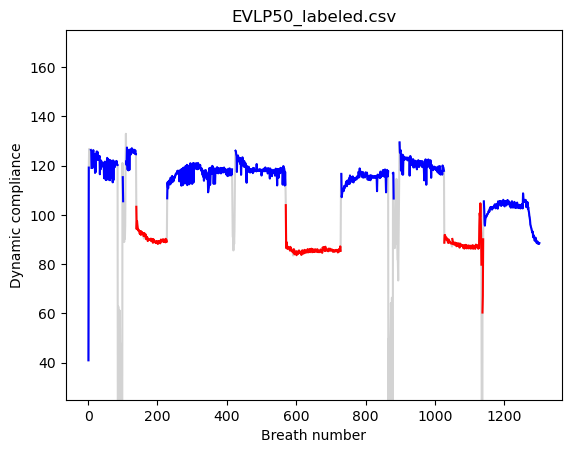

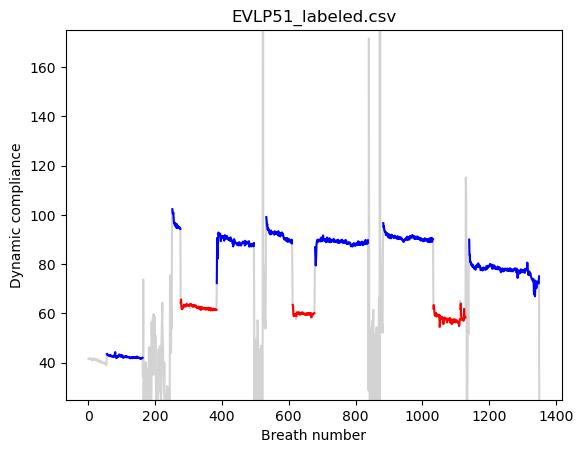

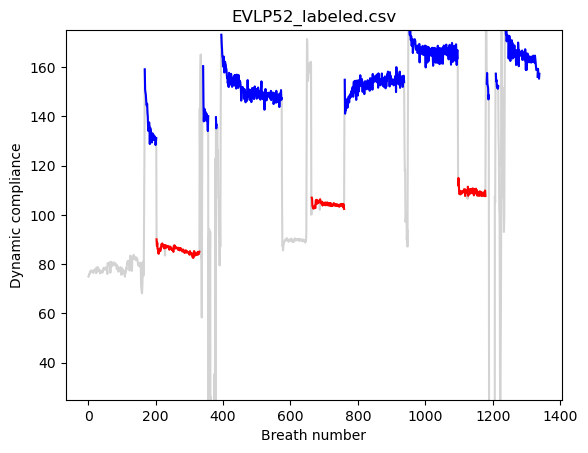

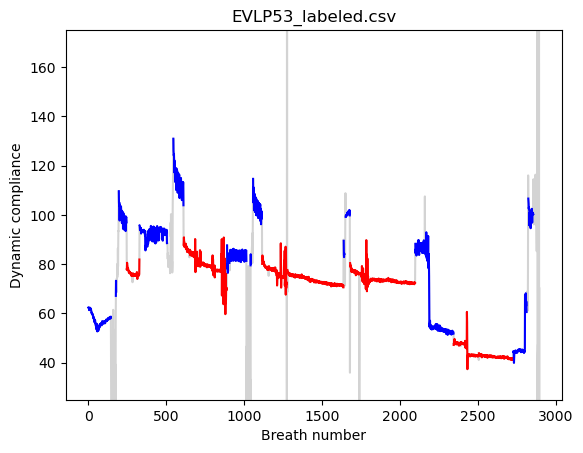

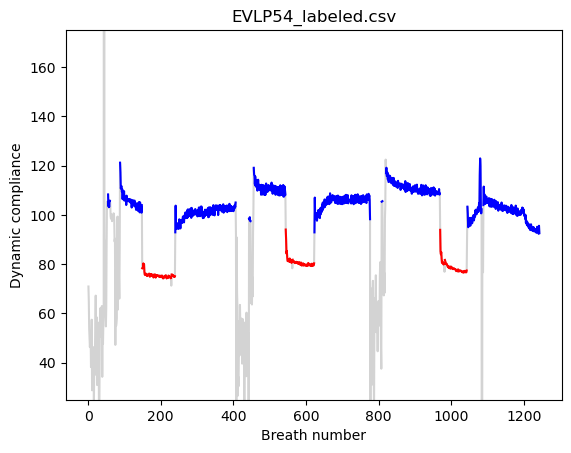

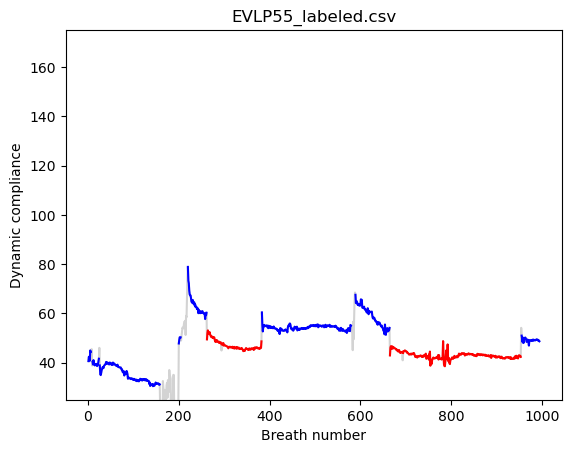

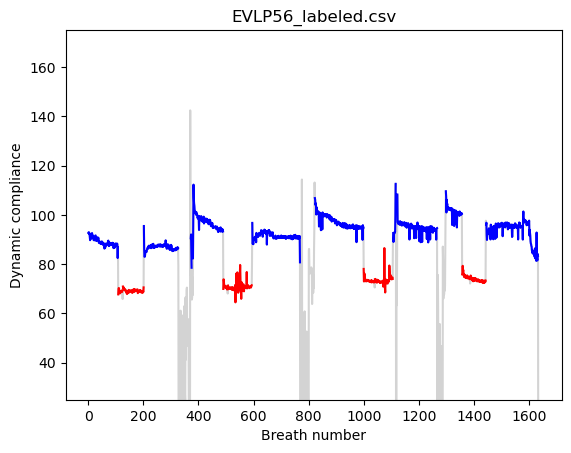

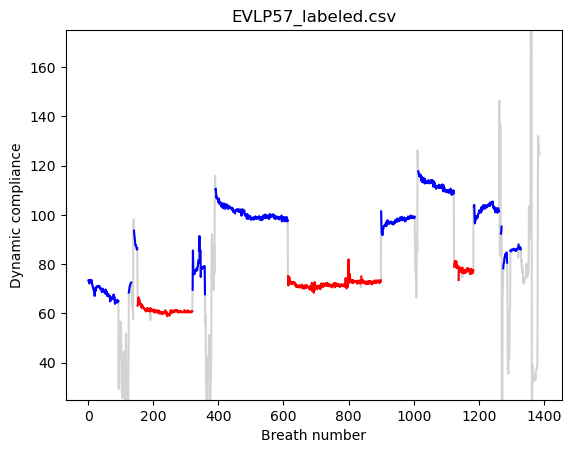

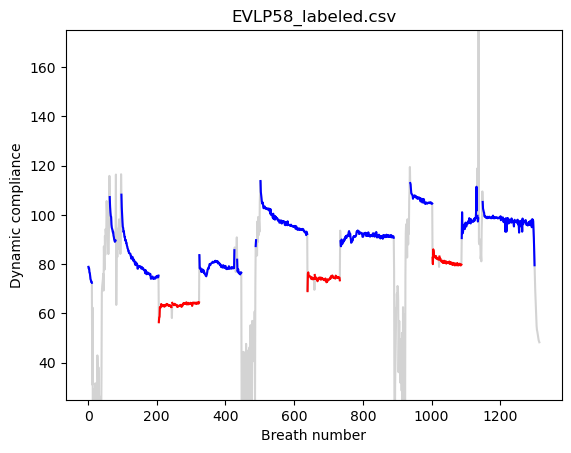

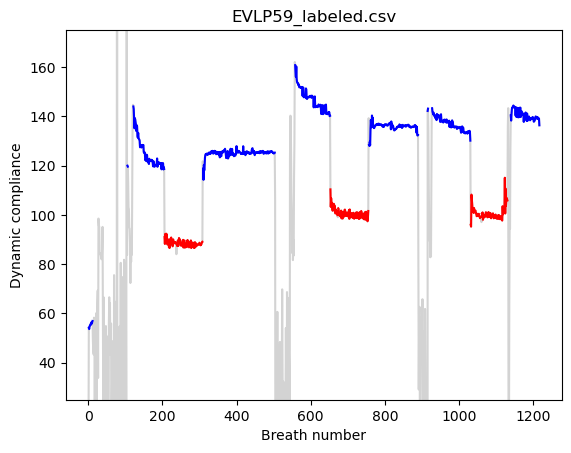

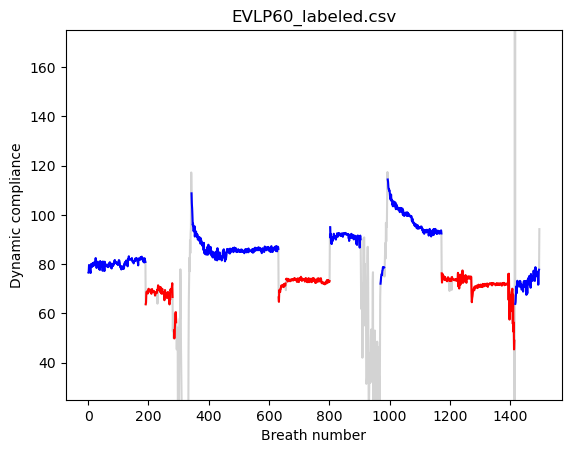

In [9]:
for csv_file in CSV_FILES:
    df = pd.read_csv(csv_file)
    plt.figure()
    plt.title(csv_file.name)
    plt.ylim(25, 175)
    t_start = None
    t_end = None
    if "Duration(s)" in df.columns:
        x_data = np.cumsum(df["Duration(s)"].to_numpy())
        x_label = "Time (s)"
    else:
        x_data = df["Breath_num"]
        x_label = "Breath number"
    plt.xlabel(x_label)
    plt.ylabel("Dynamic compliance")
    Dy_comp = df["Dy_comp"].to_numpy()
    plt.plot(x_data[t_start:t_end], Dy_comp[t_start:t_end], c="lightgray")
    for label, color in {
        "Assessment": "red",
        "Normal": "blue",
    }.items():
        Dy_comp_sub = Dy_comp.copy()
        Dy_comp_sub[df["Label"] != label] = float("nan")
        plt.plot(
            x_data[t_start:t_end],
            Dy_comp_sub[t_start:t_end],
            c=color,
        )
    # if "EVLP04_" in csv_file.name:
    #     plt.savefig("dy_comp_04.png", transparent=True)
None